## Project: No-show Appointments: Origin-Brazil

<p>Table of Contents</p>
<ul>
    <li>Introduction</li>
    <li>Data Wrangling</li>
    <li>Data Cleaning</li>
    <li>Questions</li>
    <li>Data Exploration & Visualization</li>
    <li>Final Concluaion</li>
    </ul>

## Introduction
<p>Project: No-show Appointments</p>
<p>Wouldn't it be nice to know if a reminder text-message influced an outcome? Or if a particular diagnosis was the cause for a no-show? Or who is the more likely gender to be responsible for keeping their appointments? Within this data, the answers to these questions will be communicated and data will be examined to provide a clear explantion. This dataset has been collected from Brazil and it is in complete form with 14 different colums of data.  My goal for this analysis, will focus on different variables such as: age, text-messages, gender, and diagnosis The main objective for this analysis is to show a visual of the the gender and technology prior to the no-show appointments, and if a diagnosis was a factor. The information will influence the tasks a doctor's office takes to help utilize time and reduce the amount of no-shows.The data consists of five different diagnosis' but only two will been included in the analysis, because their standard deviation is low and close to average, so the analysis will remain accurate.</p>


In [150]:
#import all packages for 
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import ttest_ind 



## Data Wrangling
<p>In this section, a closer look will provide a snapshot of the data. During this process, the analyst will determine if there are null values, and check for errors in the data. After a thorough inspection, the data will then be cleaned and prepared for analysis. </p>


In [151]:
#Read the file
df = pd.read_csv(r'C:\\Users\Anna\Downloads\noshowappointments-kagglev2-may-2016.csv')
#Show the first five columns
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.990000e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.590000e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.260000e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.680000e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.840000e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

array([[<Axes: title={'center': 'PatientId'}>,
        <Axes: title={'center': 'AppointmentID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Scholarship'}>,
        <Axes: title={'center': 'Hipertension'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Alcoholism'}>,
        <Axes: title={'center': 'Handcap'}>,
        <Axes: title={'center': 'SMS_received'}>]], dtype=object)

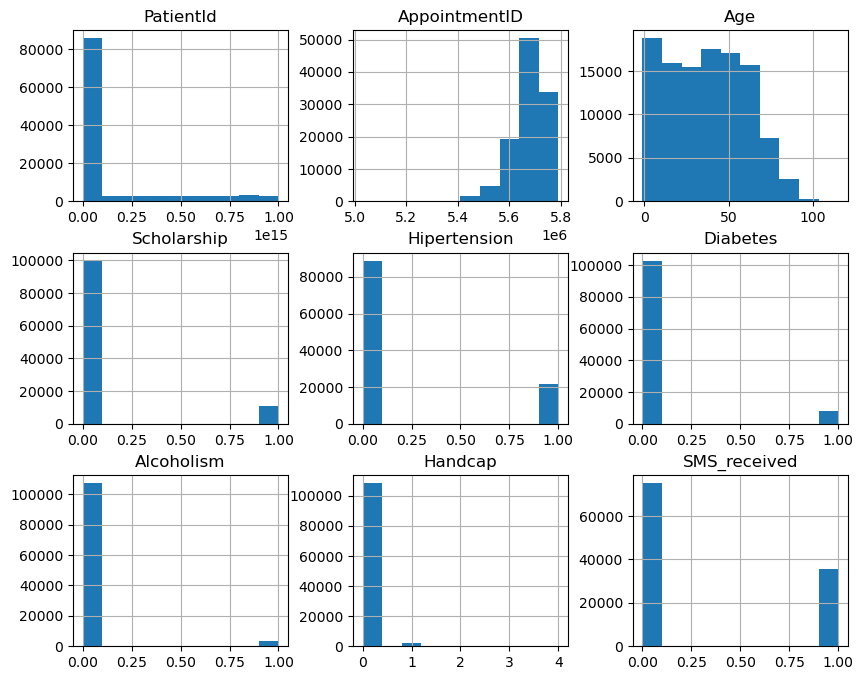

In [152]:
#Create a histogram of each individual element in the dataset 
df.hist(figsize=(10,8))

In [153]:
#A snapshot of data includes entries and colums, non-null, and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [154]:
#Get an average of the variables in the data set of each column
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474961e+14   5.675305e+06      37.088874       0.098266   
std    2.560943e+14   7.129575e+04      23.110205       0.297675   
min    3.920000e+04   5.030230e+06      -1.000000       0.000000   
25%    4.170000e+12   5.640286e+06      18.000000       0.000000   
50%    3.170000e+13   5.680573e+06      37.000000       0.000000   
75%    9.440000e+13   5.725524e+06      55.000000       0.000000   
max    1.000000e+15   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [155]:
#Check to see if the data is unique 
df.nunique()

PatientId           6100
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [156]:
#Check to see if the data has been duplicated
print(sum(df.duplicated()))

0


In [157]:
#Check to see if any of the columns are null 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

## Data Cleaning
<p>The data will now be cleaned. The unused columns will be dropped and renamed to make the data uniform. The final analysis will include these six data columns:
    <ol>
        <li>Gender</li>
        <li>Age</li>
        <li>SMS_received</li>
        <li>No-Show</li>
        <li>Hypertension</li>
        <li>Diabetes</li>
        </ol>
        
  <p>The remaining data will be removed before the analysis so the project is easy to read, and aesthetically appealing. I will also make four new columns to make the analysis easier to read. These new columns will divide the gender and no-show colums and show the count in each column. This will just be used to check and re-check the data to ensure the accuracy of the report.</p>

## Questions 
<p>Some of the questions that will be answered with this analysis will be as follows:
    <ol>
        <li>What is the male to female ratio?</li>
        <li>Did gender impact no-show appointments?</li>
        <li>How many no-show patients received a text message?</li>
        <li>Do more people with Hypertension or Diabetes no-show?</li>
     </ol>

In [158]:
#Drop any unsed columns that will not be used in analysis
df.drop([ 'AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood','Scholarship','Alcoholism','Handcap' ], axis= 1, inplace= True)

In [159]:
#To confirm changes
df.head()

PatientId Gender  Age  Hipertension  Diabetes  SMS_received No-show
0  2.990000e+13      F   62             1         0             0      No
1  5.590000e+14      M   56             0         0             0      No
2  4.260000e+12      F   62             0         0             0      No
3  8.680000e+11      F    8             0         0             0      No
4  8.840000e+12      F   56             1         1             0      No

In [162]:
#Rename colums to correct spelling
df.rename({'PatientId':'patient_id','Gender': 'gender', 'Age':'age', 'No-show':'no-show', 'SMS_received':'sms_received', 'Hipertension':'hypertension', 'Diabetes':'diabetes'}, axis= 1, inplace=True)

In [163]:
#Confirm changes
df.head()

patient_id gender  age  hypertension  diabetes  sms_received no-show
0  2.990000e+13      F   62             1         0             0      No
1  5.590000e+14      M   56             0         0             0      No
2  4.260000e+12      F   62             0         0             0      No
3  8.680000e+11      F    8             0         0             0      No
4  8.840000e+12      F   56             1         1             0      No

In [164]:
#Check to see how many colums and rows
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   patient_id    110527 non-null  float64
 1   gender        110527 non-null  object 
 2   age           110527 non-null  int64  
 3   hypertension  110527 non-null  int64  
 4   diabetes      110527 non-null  int64  
 5   sms_received  110527 non-null  int64  
 6   no-show       110527 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 5.9+ MB


In [165]:
#Create a numerical count for Male and Female to represent 0 or 1
fake = pd.get_dummies(df['gender'])
#Confirm changes
fake.head()


F  M
0  1  0
1  0  1
2  1  0
3  1  0
4  1  0

In [166]:
#Merge the values into the dataframe 
df= pd.concat([df, fake], axis = 1)
#Confirm change
df.head()


patient_id gender  age  hypertension  diabetes  sms_received no-show  F  \
0  2.990000e+13      F   62             1         0             0      No  1   
1  5.590000e+14      M   56             0         0             0      No  0   
2  4.260000e+12      F   62             0         0             0      No  1   
3  8.680000e+11      F    8             0         0             0      No  1   
4  8.840000e+12      F   56             1         1             0      No  1   

   M  
0  0  
1  1  
2  0  
3  0  
4  0

In [167]:
#Create fake column to represent no-shows
fake_one = pd.get_dummies(df['no-show'])
#Confirm changes
fake_one.head()

No  Yes
0   1    0
1   1    0
2   1    0
3   1    0
4   1    0

In [168]:
#Make column for no-show to column for "No" or "Yes"
df = pd.concat([df, fake_one], axis= 1)
#Confirm changes
df.head()

patient_id gender  age  hypertension  diabetes  sms_received no-show  F  \
0  2.990000e+13      F   62             1         0             0      No  1   
1  5.590000e+14      M   56             0         0             0      No  0   
2  4.260000e+12      F   62             0         0             0      No  1   
3  8.680000e+11      F    8             0         0             0      No  1   
4  8.840000e+12      F   56             1         1             0      No  1   

   M  No  Yes  
0  0   1    0  
1  1   1    0  
2  0   1    0  
3  0   1    0  
4  0   1    0

In [169]:
#Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   patient_id    110527 non-null  float64
 1   gender        110527 non-null  object 
 2   age           110527 non-null  int64  
 3   hypertension  110527 non-null  int64  
 4   diabetes      110527 non-null  int64  
 5   sms_received  110527 non-null  int64  
 6   no-show       110527 non-null  object 
 7   F             110527 non-null  uint8  
 8   M             110527 non-null  uint8  
 9   No            110527 non-null  uint8  
 10  Yes           110527 non-null  uint8  
dtypes: float64(1), int64(4), object(2), uint8(4)
memory usage: 6.3+ MB


In [170]:
#Created some variables with the data name from individual columns
female = df.F== True
male = df.F == False
text_received = df.sms_received == True
no_text_received =df.sms_received == False
showed_for_appointment = df.No == True
did_not_show_for_appointment = df.No == False
df.rename({'no-show':'did_not_show_for_appointment'},axis=1, inplace=True)
#Showed statistics for data
df.describe()

patient_id            age   hypertension       diabetes  \
count  1.105270e+05  110527.000000  110527.000000  110527.000000   
mean   1.474961e+14      37.088874       0.197246       0.071865   
std    2.560943e+14      23.110205       0.397921       0.258265   
min    3.920000e+04      -1.000000       0.000000       0.000000   
25%    4.170000e+12      18.000000       0.000000       0.000000   
50%    3.170000e+13      37.000000       0.000000       0.000000   
75%    9.440000e+13      55.000000       0.000000       0.000000   
max    1.000000e+15     115.000000       1.000000       1.000000   

        sms_received              F              M             No  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.321026       0.649977       0.350023       0.798067   
std         0.466873       0.476979       0.476979       0.401444   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       1.000000       0.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

                 Yes  
count  110527.000000  
mean        0.201933  
std         0.401444  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

## Data Analysis
<p> The data has been modified to make the analysis process an easier read. I have also included an individual graph for male and femmale categories so the variable quanity can be obtained visually. I have used two separate methods to obtain the individual value of each category. The first method was to check the data within the Python code and then verify with the results with a Pandas groupby() and iloc() functions to obtain the exact numbers of the entire population. I did this by summing the totals of columns and changing some of the data types within the original data in Python and I also ran a statistic test know as a Welsch Test to verify the outcome. </p>
<p> For instance, the sum of the gender colums was split into two separate columns to find the total number of men and women, then the male and female variables were represented with a one or zero. Each male then became a zero and each female became a one. I then summed the total number of each one or zero a created a graph to visually display the informaion. I re-checked my work by creating an function to aggregate the standard deviation, mean, maximum, mininum, and sum of the 'patient_id' 'gender' 'age' and 'sms_recived' categories and  compared the results with my Python code. Once verified as accurate, I compared it to the describe() function in Pandas to confirm the numbers aligned with the total population.</p>
 <p>I found that the data from the "age" category had the highest standard deviation. This is because the data has a larger age spread with a mean age of 44, and 75%  of the sampleset fell between the ages of 37-55. I also used Python aggergate function and individually grouped 'gender'  and 'sms_received' columns to check the same information. I found that the standard deviation for the individual male and female colums when calculating combined mean after splitting was not exact with a difference of .0134 between the two columns. This slight variation  would affect a larger population of a chemistry dataset, but for this dataset, the male and female standard deviation stayed between the acceptable limits.<p>I also ran a Welsch test on the data in Python after separating the data. The Welsh test produce a p-value of 1.0 indicating that the sample means within the sample groups are the same; therefore, a null hypothesis must be rejected.</p> <p> I renamed the columns to 'did_not_show_for_appointment' within in Python to eliminate any confusion a from the column name. I also created another column to represent the no-show columns as one and zeros to represent yes and no answers and added it to the sample set. The raw data did not have to be filled with any outling variables which was helpful to retain the accuracy of data. After creating the new column, I followed the same process as with the 'gender' column to produce the same results. The Welsch test again confirmed a p-value of 1.0 confirming a null hypthesis must be rejectd.  </p> 
 </p>
 <p>For the final question I used the groupby() function in Pandas to group the two diagnosis with the 'did_not_show_for_appointment' category to obtain the reslut for each individual diagnoses. Since the sample size was complete, I subtracted the diagnosis from the entire sample size and named the larger column 'other'. I re-checked my work with Python code.</p>
<p>I then created the percentages for the numbers to created a pie chart or a graph that represented the variables to answer the questions. 

In [219]:
#Added statistics within the same array to check results
df_ag = df.groupby('patient_id')['age'].agg([ 'std',max ,min,sum ,'mean'])
print(df_ag)

                    std  max  min   sum       mean
patient_id                                        
3.920000e+04        NaN   44   44    44  44.000000
4.370000e+04        NaN   39   39    39  39.000000
9.380000e+04        NaN   33   33    33  33.000000
1.420000e+05        NaN   12   12    12  12.000000
5.380000e+05        NaN   14   14    14  14.000000
...                 ...  ...  ...   ...        ...
9.960000e+14  29.908923   85    0  1011  36.107143
9.970000e+14  21.575038   77    0  2188  45.583333
9.980000e+14  25.746218   81    0  1600  41.025641
9.990000e+14  20.897187   71    1  1299  37.114286
1.000000e+15  31.505140   90    1  1337  51.423077

[6100 rows x 5 columns]


In [221]:
#female results by count
df['gender'].describe()

count     110527
unique         2
top            F
freq       71840
Name: gender, dtype: object

In [222]:
#described my dummie colums with female count for no-show appointments
df.iloc[:, 6:7].describe()

did_not_show_for_appointment
count                        110527
unique                            2
top                              No
freq                          88208

In [223]:
#Python aggergate function to check the stats with describe() function.
df_agg = df.groupby('gender')['sms_received'].agg([ 'mean',max ,min,sum, 'std' ])
print(df_agg)



            mean  max  min    sum       std
gender                                     
F       0.336888    1    0  24202  0.472649
M       0.291571    1    0  11280  0.454492


In [224]:
#Checked the std individually for the difference from the results above. 
df.iloc[:, 6:-1].describe()

F              M             No
count  110527.000000  110527.000000  110527.000000
mean        0.649977       0.350023       0.798067
std         0.476979       0.476979       0.401444
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       1.000000
50%         1.000000       0.000000       1.000000
75%         1.000000       1.000000       1.000000
max         1.000000       1.000000       1.000000

In [225]:
#Welsch test for no- show columns
df[df['did_not_show_for_appointment'] == 'No']
df[df['did_not_show_for_appointment']== 'Yes']
#P-value results 
ttest_ind(df['age'], df['age'],equal_var= False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [226]:
#Welsch test for the gender columns 
df[df['gender'] == 'M']
df[df['gender']== 'F']
#P-value results 
ttest_ind(df['age'], df['age'],equal_var= False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [ ]:
df[df['hypertension']= ]

### Question 1: What is the sample size of Men to Women?

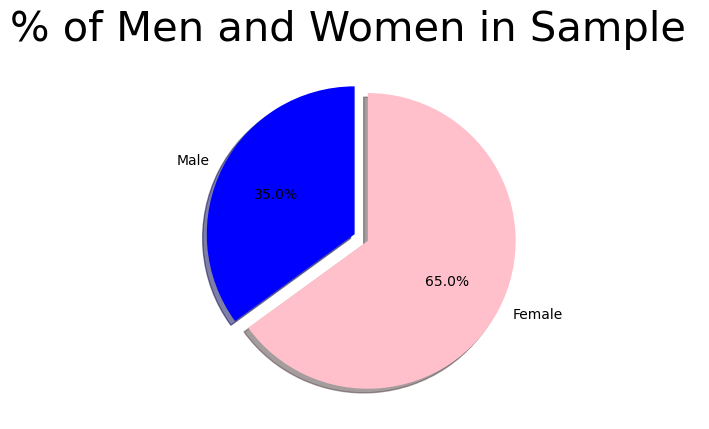

In [146]:
#labels for data
labels= 'Male', 'Female'
sizes = [38687,71840]
color = ['blue', 'pink']
#Cool separation of chart data
explode =(0,0.1)
fig, ax= plt.subplots()
#Chart details
df[['gender']].describe()
ax.pie(sizes,explode =explode, labels=labels, colors= color, autopct= '%1.1f%%', shadow=True, startangle= 90)
plt.title('% of Men and Women in Sample ', fontsize = 30);

In [195]:
#Female variable
fcount = 0 
#Male variable
mcount = 0
#Check number of females and males with for loop
for i in df['F']:
    if i == 1:
        fcount += 1
    else:
        mcount += 1
#Total of men and women category for later graphs        
print(fcount, mcount)


71840 38687


## Answer: 
<p> By examining this pie chart we can see that 35% of the patients in the sample set are male and 65% of the patients in the sample set were female. The sample size represents the entire population of the sample set. The graph above is color cordinated with pink to indicate 'Females' and blue to indicate 'Male'. The code directly above represents the total population. The female population is represented by fcount variable; it totals 71840 ot the total 110527 population; sequentially, the mcount represents the male variable and totals 38687 of the 110527 population</p>

### Question 2: Did gender impact no-show appointments?
<p>The graph below shows the number of male and female no-show appointments. The variables were from gender and no-show columns. The code directly below is python code to count the individual variables from the yes and no columns. The nno_show represents a "no" indicating they did show up for their scheduled appointment and the 'yes' variable is represented by the yno_show variable, also demonstrating the patient did not show for their appointment. The total number of no-shows combined with kept appointments specifies the total population of the data set. The total for the no-shows is 22319 and 88208 appointments were kept. This sum of the two categories is the complete population size of 110527. The size of the male and female population totals were taken from the graph above and combined to create the graph below.</p>

In [207]:
df.iloc[:, 6:7].describe()

did_not_show_for_appointment
count                        110527
unique                            2
top                              No
freq                          88208

In [44]:
df.groupby(['F', 'did_not_show_for_appointment']).size()


F  did_not_show_for_appointment
0  No                              30962
   Yes                              7725
1  No                              57246
   Yes                             14594
dtype: int64

In [205]:
#Variable for Yes no shows
yno_show= 0
#Variable for No no shows
nno_show = 0
#For loop for graph 
for i in df['No']:
    if i == 1:
        nno_show += 1
    else:
        yno_show += 1
#Variable for no_show in yes or no
print(nno_show, yno_show)

88208 22319


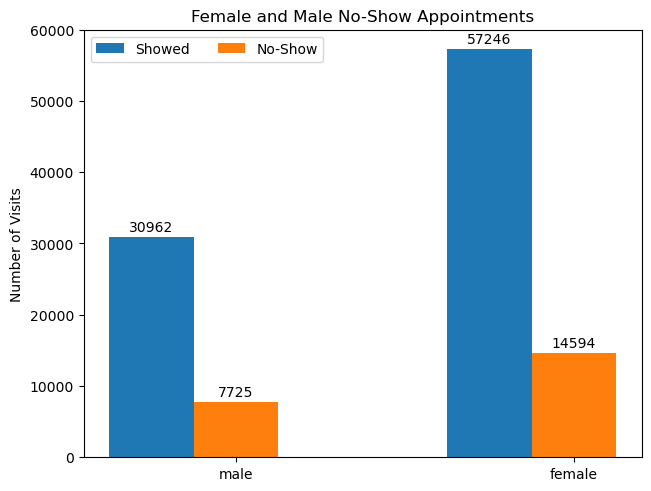

In [26]:
#Variables for graphs
gender = ("male", "female")
#Array with values added for accuracy
no_show_means = {
    'Showed': (30962, 57246),
    'No-Show': (7725, 14594),
    
}


x = np.arange(len(gender))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
#for loop for iteration in arrays
for attribute, measurement in no_show_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute )
    ax.bar_label(rects, padding=2 )
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Visits')
ax.set_title('Female and Male No-Show Appointments')
ax.set_xticks(x + width, gender)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 60000)

plt.show()

## Answer:
<p> This graph demonstrates the male and female sample and the number of showed and no-showed appointments for the entire population. The number of visits is the y-axis and the 'male' and 'female' variables makes up the x-axis. The orange bars specifies the number of no-show appointments, and the blue bar represents the number of appointments that were kept. Out of the 64.99% of female patients 51.79% female patients showed up for their appontments, while 13.20% did not show. And out of the 34.01% of male patients 28.01% showed up for their appointments, while 6.98% of male patients did not show up for their appointments.</p>

### Question 3: How many no-show patients received a text message?
<p> The data is taken from the sms_recieved and the no-show variables. The code below shows the total population size that received a text message. The 'ntext' variable shows that 75045 people in the population did not received a text message; in comparison, 35482 people did receive a text message. This information is useful because the amount of text messages sent reveals a need for more text messages. The population of the no-show variable was taken from the data above and also includes the entire population.</p>

In [27]:

#Check numbers for text message
ytext= 0
ntext = 0
#for loop to get numbers of text messages
for i in df['sms_received']:
    if i == 0:
        ntext += 1
    else:
        ytext += 1
    
print(ntext, ytext)

75045 35482


In [28]:
df.groupby(['did_not_show_for_appointment', 'sms_received']).size()

did_not_show_for_appointment  sms_received
No                            0               62510
                              1               25698
Yes                           0               12535
                              1                9784
dtype: int64

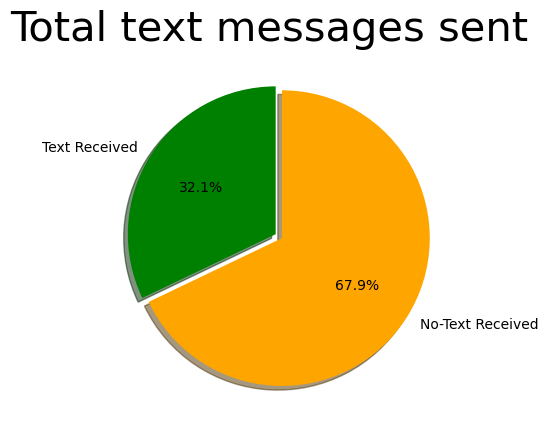

In [53]:
labels= 'Text Received', 'No-Text Received'
sizes = [ 35482, 75045]
color = ['green', 'orange']
explode =(0,0.05)
fig, ax= plt.subplots()
ax.pie(sizes,explode =explode, labels=labels, colors= color, autopct= '%1.1f%%', shadow=True, startangle= 90)
plt.title('Total text messages sent ', fontsize = 30);

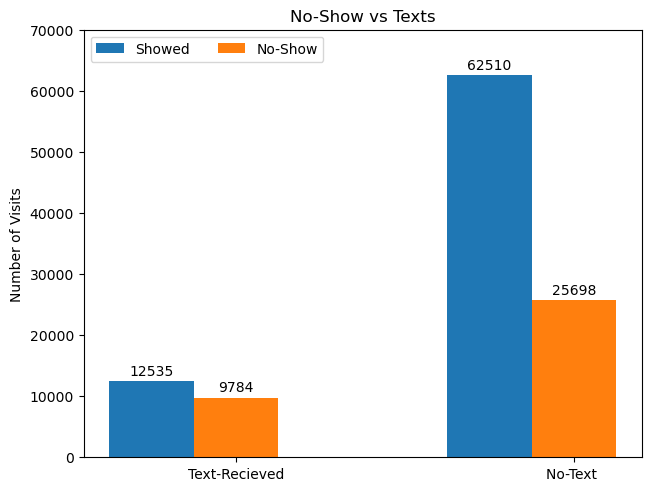

In [30]:
#Variables for graph
text = ("Text-Recieved", "No-Text ")
no_show_means = {
    'Showed': (12535, 62510),
    'No-Show': (9784, 25698),
   
}

# the label locations
x = np.arange(len(text)) 
# the width of the bars
width = 0.25 
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
#for loop for iteration in arrays
for attribute, measurement in no_show_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute )
    #padding for bar and size
    ax.bar_label(rects, padding=2 )
    multiplier += 1

# Add text for labels, title and custom x-axis tick labels
ax.set_ylabel('Number of Visits')
ax.set_title('No-Show vs Texts')
ax.set_xticks(x + width, text)
#number of columns
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 70000)

plt.show();

## Answer: 
<p>The graph above answers the question - Did more people received a text message no-show? Out of the 32.1% of people that recieved a text message 8.85% did not show for their appointment; simmilarly, out of a sample size of 67.9% who did not recieve a text message 23.25% did not show up for their appointment. The blue graph represents the number of people who showed for their appointments and the orange column represents the number of no-shows per visit.</p>


### Question 4: Do more people with Hypertension or Diabetes no-show?
<p> The is data was taken from the Hypertension and the Diabetes columns and the no-show columns. For the graph, I summed the totals so the percentages are for the total population. The purple represents the percentage of the people who had a Hypertension diagnosis and the green portion represents the total patients with a Diabetes diagnosis. The first graph is only to show the diagnosis as a total population size and then the bar graph below will display the no-show information for each diagnosis. 

In [45]:
#Variables to complete graph
ydiabe = 0
ndiabe = 0
#For loop to check work
for i in df['diabetes']:
    if i == 0:
       ndiabe += 1
    else:
        ydiabe += 1
print(ndiabe, ydiabe)

102584 7943


In [46]:
#Variables to complete graph
yhyper = 0
nhyper = 0
#For loop to check work
for i in df['hypertension']:
    if i == 0:
        nhyper += 1
    else:
        yhyper += 1
print(nhyper, yhyper)

88726 21801


In [31]:
df.groupby(['hypertension', 'did_not_show_for_appointment']).size()

hypertension  did_not_show_for_appointment
0             No                              70179
              Yes                             18547
1             No                              18029
              Yes                              3772
dtype: int64

In [48]:
df.groupby(['diabetes', 'did_not_show_for_appointment']).size()

diabetes  did_not_show_for_appointment
0         No                              81695
          Yes                             20889
1         No                               6513
          Yes                              1430
dtype: int64

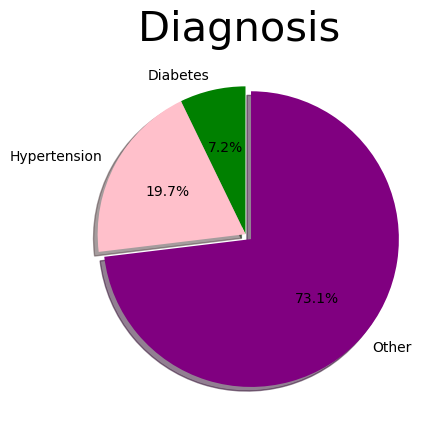

In [47]:
labels= 'Diabetes', 'Hypertension', 'Other'
sizes = [ 7943, 21801, 80783]
color = ['green', 'pink', 'purple']
explode =(0,0,0.05)
fig, ax= plt.subplots()
ax.pie(sizes,explode =explode, labels=labels, colors= color, autopct= '%1.1f%%', shadow=True, startangle= 90)
plt.title('Diagnosis ', fontsize = 30);

### Answer: 
<p>The python code above checks the numbers and provides a total population percentage of each diagnosis. There are 21801 people in this sample that have been diagnosed with Hypertension which acounts for 19.7% of the total population, these numbers are also displayed with the 'yhyper' and 'nhyper' values from above. Simmilarly, the same code was used to display the total Diabetes within the population. There are 7943 people that account for 7.2% of the entire population that has Diabetes. The Diabetes variables are represented by the 'ydiabe' and 'ndiabe' variables in the python code above. 

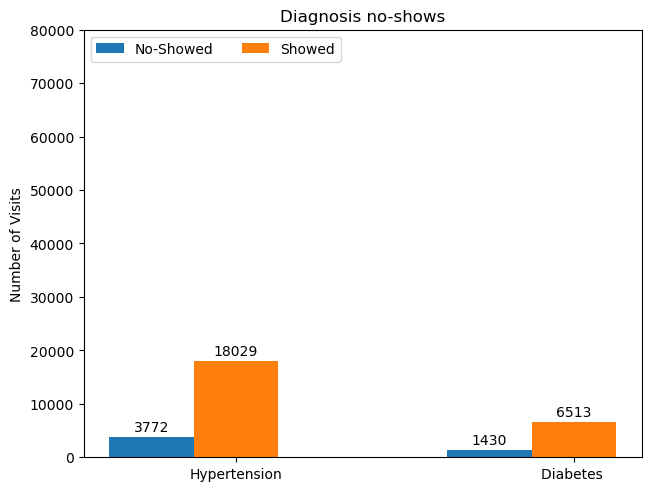

In [49]:
#Variables for graph
text = ("Hypertension", "Diabetes ")
no_show_means = {
    'No-Showed': (3772, 1430),
    'Showed': (18029, 6513 ),
   
}

# the label locations
x = np.arange(len(text)) 
# the width of the bars
width = 0.25 
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
#for loop for iteration in arrays
for attribute, measurement in no_show_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute )
    #padding for bar and size
    ax.bar_label(rects, padding=2 )
    multiplier += 1

# Add text for labels, title and custom x-axis tick labels
ax.set_ylabel('Number of Visits')
ax.set_title('Diagnosis no-shows')
ax.set_xticks(x + width, text)
#number of columns
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 80000)

plt.show();

### Answer:
<p> Out of the 19.7% of people in the data set with Hypertension only 3.14% did not show for their appointment, meaning one out of every 4.77 people did not show for their appointment. And out of the 7.2% of people with Diabetes only 1.29%, of the people, did not show for their appointment, interperted as 1 in 4.55 people did not show up for their appointment. </p>

## Conclusion
<p> Through this analyzation, we have answered several questions, the first being was the sample size equal in the gender category. The answer is no. The sample size of women to men is approximately three women to every man.</p>
<p> Although there was a smaller percentage of men than women that had appointments, the data proves that men are slightly more responsible than women when keeping their appointments. The data proves that 82.35% of men kept their appointments; whereas, 79.68% of women kept their appointments. </p>
<p>The method used to determining the total text messages returned surprising results. The results proved that only 32% of the patients received a text message, and 68% did not. It would be a huge opportunity for a doctor to monoploize on this fact in the future, because it is possible that not all the people in Brazil are dependent on technology, or possibly not everyone has access to a cell phone. </p>
<p>A comparison of the no-show results proved when a text message was used it was 0.0004% more effective. Which means that receiving a text message is an effective measure in no-show appointments. This is a key indicator that if the number of text messages were to increase the number of no-show appointment would decrease by .0004%. The doctors office could automate the total text messages sent and decrease their no-show visits by aproximately 44 visits. </p>
<p>The last question was an analyisis of two differnt diagnosis, Hypertension and Diabetes. The objective was to verify if one had more no-shows than the other. The data showed that the two combined diagnosis only represented 26.9% of the total sample size, and there was a larger amount of people with Hypertension than with Diabetes. The data proved, in conclusion, 52 more people with Diabetes no-showed than people with Hypertension. </p>